# MNIST Dataset
# Logistic Regression

### Mnist Prediction is said to be the Hello World for machine learning.
### Mnist dataset is a huge collection of labeled hand written digits.
### Data Dictionary:

* There are 784 columns, each column represent a pixel of the hand written digit image.
* These pixels are flatten from 28 X 28 pixels image.
* To rebuild the image take 1st 28 columns as 1st row, next 28 columns as 2nd row, so on and so forth.
* There is also a column called **label** which tells the value of the digit represented by the pixels.


In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv("datasets/mnist/dataset.csv", nrows=10000)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Helper function to show the images with given labels
def show_data(pxls, labels):
    fig, axs = plt.subplots(1, len(pxls), squeeze=False)
    for i, ax in enumerate(axs[0]):
        ax.axis("off")
        ax.set_title(labels.iloc[i])
        ax.imshow(pxls.iloc[i].values.reshape((28, 28))) # Reshaping the pxls to 28 X 28 image with the help of numpy method

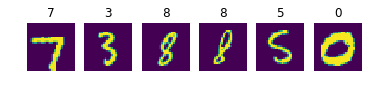

In [4]:
# Showing 6 images along with their actual labels from the dataset using the helper function above.
sample_no = 6
data = df.sample(sample_no)
pxls = data.drop(["label"], axis=1)
labels = data["label"]
show_data(pxls, labels)

In [5]:
# Separating the Features and Label
X = df.drop(["label"], axis=1)
y = df["label"]

In [6]:
# Splitting dataset into Training and Testing parts
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2)

In [26]:
# Training Logistic Regression model from sklearn library
model = LogisticRegression()
model.fit(trainX, trainy)

/home/parth/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/parth/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/parth/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
# Predicting for the Testing dataset using trained model
predictions = model.predict(testX)

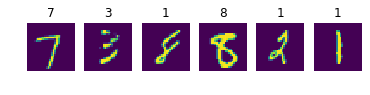

In [28]:
# Showing few of the Testing dataset images with their predicted labels 
show_data(testX.head(6), pd.Series(predictions).head(6))

In [29]:
accuracy_score(testy, predictions)

0.836